<a href="https://colab.research.google.com/github/ninavankalas/OMM/blob/main/38_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Условие задачи**

Используя метод переменных направлений, решите краевую задачу:

$$\frac{\partial u}{\partial t} = \Delta u, 0 < x < 1, 0 < y < 2, t > 0$$
$$\left. u \right|_{x=0} =  \left. u \right|_{x = 1}  = 0$$
$$\left. u \right|_{y=0} = \left. \frac{\partial u}{\partial y}\right|_{y=2} = 0 $$
$$\left. u \right|_{t=0} = sin(2\pi x)sin(\pi y/4)  $$


# **Аналитическое решение задачи** 
Из постановки задачи видно, что начальные условия и неоднородность ортогональны.

Будем искать решение задачи в виде:
$$u(x,y,t) = \sum_m^{\infty}\sum_n^{\infty} T_{nm}(t)V_{nm}(x,y)$$

$$\frac{T'(t)}{T(t)} = \frac{V''(x,y)}{V(x,y)} = -\lambda$$
  Используя деление переменных получим явный вид функций $T_{nm}(t),V_{nm}(x,y)$, который определяется из решений соответствующей задачи Штурма-Лиувилля и задачи Коши:
$$\begin{cases} 
  T' + \lambda T = 0 \\
  T(0) = sin(2\pi x)sin(\pi y/4) 
\end{cases} $$

$$ \begin{cases}
 V'' + \lambda V = 0, \\
 \left. V \right|_{x=0} = \left. V \right|_{x =1} = 0 \\
 \left. V \right|_{y=0} = \left. \frac{\partial u}{\partial y} \right|_{y=2} = 0 
\end{cases}
$$

Теперь, представляя функцию V в виде V(x,y)=X(x)Y(y) и применяя метод разделения переменных, получим две задачи Штурма-Лиувилля на отрезке:

$$
\begin{cases}
 X'' + \nu X = 0 \\
 X|_{x=0} = X|_{x=1} = 0
\end{cases}
$$

$$
\begin{cases}
 Y'' + \mu Y = 0\\
 \frac{\partial u}{\partial y }|_{y=2} = u|_{y=0} = 0
\end{cases}
$$
Решения имеют вид:
$$
X_{n} = sin(\pi n x), \nu_n = \pi^2 n^2, n = 0,1,2... \\
Y_{m} = sin(\frac{\pi}{4} (2m - 1)y), \mu_m = \frac{\pi^2}{16}(2m -1)^2, m = 0,1,2... \\
\lambda_{mn} = \pi^2 n^2 + \frac{\pi^2}{16}(2m - 1)^2
$$

Тогда 

$$v_{nm} = sin(\pi n x) sin(\frac{\pi}{4} (2m - 1)y) $$

$$\sum T'_{nm}(t) V_{nm}(x,y) = -\sum \lambda_{mn} T_{nm}(t) V_{nm}(x,y) $$

при t = 0:  \\
$T(0) = sin(2\pi x)sin(\pi y/4)  $; из этого следует, что $n = 2, m = 1$

$T_{21}' + \lambda_{21} T_{21} = 0$, где $\lambda_{21} = 4\pi^2 + \frac{\pi^2}{16}$
Решение этого уравнения:
$T(t) = e^{-65\pi^2t/16}$

$u(x,y,t) = e^{-65\pi^2t/16} sin(2 \pi  x) sin(\frac{\pi}{4}y) $









# **Численное решение**

**Конечно – разностная аппроксимация**

Для решения задачи воспользуемся методом переменных направлений. Для начала введем сетку в области $\Omega = G * [0, T]$
$$G=\\{(x,y):0⩽x⩽1,0⩽y⩽2\\}$$
$$\omega_{h_x h_y τ}=(x_i=i h_x,i=0,1,…,N_x;  N_x h_x=π/2;
\\\\y_j=j h_y,j=0,1,…,N_y;   N_y h_y=π/2;
\\\\t^k=k τ,k=0,1,...) \\
$$

где $Nτ,Nx,Ny$ - число узлов сетки; $hx,hy,τ$ - шаги по осям x, y, t соответственно. На введенной сетке будем рассматривать сеточные функции $z_{kij}=U(x_i,y_j,t^k)$

Введем разностную аппроксимацию оператора Лапласа: 
     $$\Lambda z^k_{ij} = \Lambda_x z^k_{ij} + \Lambda_y z^k_{ij}
     $$
     $$\Lambda_x z^k_{ij} = \dfrac{z^k_{(i+1)j} - 2 z^k_{ij} + z^k_{(i-1)j}}{h_x^2}$$
     $$\Lambda_y z^k_{ij} = \dfrac{z^k_{i(j+1)} - 2 z^k_{ij} + z^k_{i(j-1)}}{h_y^2}$$


Уравнение для сеточной функции можно записать в виде:

$$ {z^{k+1}_{i,j} - z^k_{i,j} \over  \tau} = \wedge (\sigma z^{k+1}_{i,j} + (1-\sigma)z^{k}_{i,j}) + f^{k + {1 \over 2}}_{i,j}, \textbf{где} \; f^{k + {1 \over 2}}_{i,j} = 0 $$

Таким образом, можем составить следующую разностную схему:

$$ {z^{k+1}_{i,j} - z^k_{i,j} \over  \tau} = \wedge (\sigma z^{k+1}_{i,j} + (1-\sigma)z^{k}_{i,j}) + f^{k + {1 \over 2}}_{i,j}$$




Начальные условия и  граничные условия: \\
$z_{ij}^0 = sin(2\pi x_n)sin(\pi y_m/4)$ \\
$\frac{z_{i1}^k - z_{i0}}{h_y} = z^k_{i,N_y} = 0$
$ z^k_{i,0} = z^k_{i,1},\; z^k_{i,N_y} = z^k_{i,N_y-1}, \; i = 0,1, ... , N_x, \; k = 0,1, ...$
$ z^k_{0,j} = z^k_{N_x, j},\; z^k_{N_x,j} = 0, \; j = 0,1, ... , N_y, \; k = 0,1, ...$ \\
Граничные условия Дирихле $𝑢|_{𝑥=0}=𝑢|_{𝑥=1}=0$ аппроксимируются точно.
Для расчёта сеточной функции в следующий момент времени используется схема переменных направлений, которая осуществляется в два шага с использованием промежуточного шага:

$$\frac{z^{k+1/2}-z^k}{0.5\tau}=\Lambda_1z^{k+1/2}+\Lambda_2z^k$$

$$\frac{z^{k+1}-z^{k+1/2}}{0.5\tau}=\Lambda_1z^{k+1/2}+\Lambda_2z^{k+1}$$

Данная разностная схема является экономичной, она сочетает в себе лучшие качества явных ($\sigma = 0$)(	 количество итераций) и неявных  ($\sigma = 1$)(безусловная устойчивость) разностных схем.

Суть данной разностной схемы в том, что мы вводим дополнительный слой k=1/2 при переходе от k к k+1. Таким образом, этот переход осуществляется в два этапа:

1) Решается первое уравнение – явное по направлению x и неявное по y

2) Затем решается второе уравнение - противоположным образом.

При использовании явных схем число действий для определения k+1 значения во всех узлах сетки пропорционально числу узлов. 




**Устойчивость и аппроксимация** \\
Исследуем устойчивость схемы переменных направлений по начальным данным с помощью спектрального метода Неймана.  
Выражая из разностных уравнений, получаем: 
$z_{i,\ j}^{k + 1/2} = \frac{z^k - z^{k + 1}}{2} - \frac{\tau }{4}\Lambda_1 (z^{k+1} - z^k) = \frac{z^k - z^{k + 1}}{2} - \frac{\tau^2 }{4} \Lambda_1 z_t  $

Представление решения с помощью гармоник: \\
$$z_{n,\ m}^k =\lambda_x^k e^{i\left(\alpha n+\beta m \right)}$$


$$\Lambda_x  e^{i\left(\alpha n+\beta m \right)} = e^{i\left(\alpha n+\beta m \right)} \frac{e^{i\alpha} - 2 + e^{-i\alpha}}{h_x^2} = \frac{4}{h_x^2}sin^2(\frac{\alpha}{2} e^{i\left(\alpha n+\beta m \right)}) $$
$$\Lambda_y  e^{i\left(\alpha n+\beta m \right)} = e^{i\left(\alpha n+\beta m \right)} \frac{e^{i\beta} - 2 + e^{-i\beta}}{h_y^2} = \frac{4}{h_y^2}sin^2(\frac{\beta}{2} e^{i\left(\alpha n+\beta m \right)}) $$

$$\lambda_x^k = \frac{\left(1 -2\tau h_y^2\sin^2{\left(\frac{\beta}{2}\right)}\right)(1 -2\tau h_x^2\sin^2{\left(\frac{\alpha}{2}\right)}}{1 + 2\tau h_x^2 sin^2{\left(\frac{\alpha}{2}\right)} (1 + 2\tau h_y^2 sin^2{(\frac{\beta}{2}})) } \leq 1$$ 



⇒ Таким образом видно, что для каждого из уравнений выполняется критерий Неймана.  Схема переменных направлений безусловно устойчива при
любом выборе шага сетки. 

Порядок аппроксимации схемы переменных направлений , учитывая аппроксимацию граничных условий,  равен $O(h^2_x + h^2_y + \tau^2)$





**Метод прогонки**
Рассмотрим первый полуслой и будем решать задачу методом прогонки. Пусть имеется уравнение с начально-граничными условиями:
\begin{cases}
                A_i y_{i-1} - B_i y_i + C_i y_{i+1} = F_i,  |B_i|=|A_i| + |C_i| \\
                y_0 = \alpha_{1} y_{1} + \beta_{1} ,  i = \overline{0, N} \\ 
                y_N = \alpha_2 y_{N-1} + \beta_2
\end{cases}     

Пусть значение искомой функции в двух соседних точках связаны следующим линейным соотношением $y_{i-1} = d_iy_i + \sigma_i$, тогда: 
\begin{align}
       & A_i(d_i y_i + \sigma_i) - B_i y_i + C_i y_{i+1} = F_i \\
       & (A_id_i - B_i)y_i = -C_i y_{i+1} + F_i - \sigma_i A_i \\
        & y_{i+1}\left[ (A_id_i - B_i)d_{i+1} + C_i \right] = F_i - \sigma_i A_i - (A_id_i - B_i)\sigma_{i+1}
\end{align}
    
Для того, чтобы это соотношение было верно для любых $y_{i+1}$ нужно, чтобы выражение в квадратных скобках и правая часть было равны нулю. Приравнивая их нулю, получаем рекуррентные формулы для определения прогоночных коэффициентов:
\begin{equation}
       d_{i+1} = \dfrac{C_i}{B_i - A_i d_i},\sigma_{i+1} = \dfrac{F_i - \sigma_i A_i}{A_id_i - B_i}
\end{equation}
Используя эти значения,  совершим прогонку в направлении возрастания индекса, последовательно определяя значения коэффициентов $d_i$ и $\sigma_i$ для i=1,N

Получаем рекуррентные соотношения для $y_{N-1}$ и $y_N$: $y_{N-1} = d_N y_N + \sigma_N$ и $y_N = \alpha_2 y_{N-1} + \beta_2$. Из этих соотношений получаем: 
\begin{equation}
       y_{N-1} = d_n y_N + \sigma_N = d_N(\alpha_2y_{N-1} + \beta_2) + \sigma_N  \implies  y_N = \dfrac{\alpha_2 \sigma_N + \beta_2}{1 - d_N \alpha_2} 
\end{equation}
При $d_1 = \alpha_1$ и условиях, наложенных при постановке задачи на $B_i, A_i, C_i, \alpha_{1, 2}$ получаем, что  положительный знаменатель, что означает, что значение $y_N$ определено. 
Используя найденное значение $y_N$, делаем обратную прогонку в сторону уменьшающихся значений индекса, поледовательно определяя значения $y_i$.




Приступим к решению задач. Для начала, представим **аналитическое решение задачи:**


Используемые библиотеки:

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import matplotlib.animation as ani

In [76]:
from matplotlib import rc
rc('animation', html='jshtml')

In [95]:
Nx, Ny, Nt = 100, 100, 100
X1, X2 = 0, 1
Y1, Y2 = 0, 2
T1, T2 = 0,  0.05

x = np.linspace(X1,X2,Nx)
y = np.linspace(Y1,Y2,Ny)
t = np.linspace(T1,T2,Nt)

h_x=(X2-X1)/(Nx - 1) # для численного решения
h_y=(Y2-Y1)/(Ny - 1)
tau=(T2-T1)/(Nt - 1)

gamma_x = 4 * tau / (h_x*h_x) #для численного решения
gamma_y = 4 * tau / (h_y*h_y)





2.0


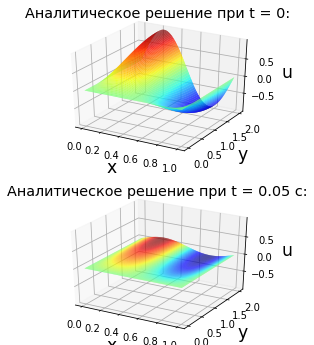

In [115]:
xx, yy = np.meshgrid(np.linspace(X1, X2, Nx), np.linspace(Y1, Y2, Ny))

z_0 = np.sin(2*np.pi*xx)*np.sin(np.pi*yy/4)*np.exp(-65*(np.pi ** 2)*0/16)
z_1 = np.sin(2*np.pi*xx)*np.sin(np.pi*yy/4)*np.exp(-65*(np.pi ** 2)*t[-1]/16)

fig = plt.figure(figsize=plt.figaspect(1.5))
#fig = plt.figure(figsize = (9, 9))
ax3d = fig.add_subplot(2, 1, 1, projection='3d')
ax3d.plot_surface(xx, yy, z_0, rstride = 1, cstride = 1, cmap = cm.jet)
ax3d.set_proj_type('persp') # or ortho
ax3d.set_xlabel('x', fontsize="xx-large")
ax3d.set_ylabel('y', fontsize="xx-large")
ax3d.set_zlabel("u", fontsize="xx-large")
zmin, zmax = ax3d.get_zlim()
plt.title('Аналитическое решение при t = 0:', fontsize="x-large")
ax3d = fig.add_subplot(2, 1, 2, projection='3d')
ax3d.plot_surface(xx, yy, z_1, rstride = 1, cstride = 1, cmap = cm.jet)
ax3d.set_proj_type('persp') # or ortho
ax3d.set_xlabel('x', fontsize="xx-large")
ax3d.set_ylabel('y', fontsize="xx-large")
ax3d.set_zlabel("u", fontsize="xx-large")
ax3d.set_zlim(zmin, zmax)
plt.title('Аналитическое решение при t = 0.05 c:', fontsize="x-large")
plt.show()



Теперь решим задачу **численно**.


Начальные условия: 

In [90]:
u=np.zeros((Nx,Ny,Nt*2+1))


#for i in range(0,Nx):
 # for j in range(0,Ny): 
u_init=np.sin(2*np.pi*xx)*np.sin(np.pi*yy/4)*np.exp(-65*(np.pi ** 2)*0/16)

for i in range(0, Nx):
  for j in range(0, Ny):
    u[i,j, 0] = u_init[i,j]


**Метод прогонки**

In [120]:
u_0 = u
def progonX( i2,j):
    
    d=np.zeros(Nx)             
    sigma = np.zeros(Nx)
    
    d[1] = 0           
    sigma[1] = 0
    
    A = 0.5 * gamma_x
    B = 1 + gamma_x
    C = 0.5 * gamma_x
    
    for m in range (1,Nx-1):
        F_i1 = - (0.5 * gamma_y*(u[m,i2-1,j-1]+u[m,i2+1,j-1])+(1-gamma_y)*u[m,i2,j-1])
        
        d[m+1] = C / (B - A * d[m])  
        
        sigma[m+1] = (F_i1 - A * sigma[m]) / (A * d[m] - B)
       
              
    for m in range(Nx-1,0,-1):                  
        u[m-1,i2,j]=d[m] * u[m,i2,j] + sigma[m]
    u[Nx-1,i2,j]= 0 
    
def progonY(i1,j):
    d=np.zeros(Ny)
    sigma = np.zeros(Ny)
    d[1] = 0           
    sigma[1] = 0
    
    A = 0.5 * gamma_y
    B = 1 + gamma_y
    C = 0.5 * gamma_y
    for m in range (1,Ny-1): 
        F_i2 = - (0.5 *gamma_x*(u[i1-1,m,j-1]+u[i1+1,m,j-1])+(1-gamma_x)*u[i1,m,j-1]) 
        d[m+1] = C / (B - A * d[m])  
        sigma[m+1] = (F_i2 - A * sigma[m]) / (A * d[m] - B)
    
    u[i1,Ny-1,j]= sigma[Ny-1]/(1-d[Ny-1])
    
    for m in range(Ny-1,0,-1):                  
        u[i1,m-1,j]=d[m] * u[i1,m,j] + sigma[m] 
    
    
  

for j in range(1,2*Nt,2):
    for i2 in range(0,Ny - 1):
        progonX( i2,j)
    for i1 in range(0,Nx - 1):
        progonY( i1,j+1)
   
    for m in range(0, Nx):
      u[m, Ny-1, j] = u[m, Ny-2, j] 
      u[m, 0,j] = 0
        

  


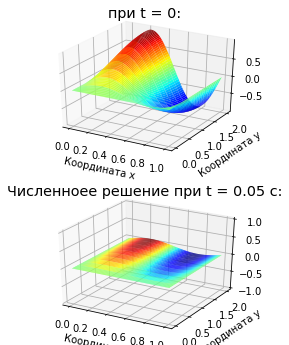

In [119]:
T = np.linspace(0, 0.05, num=Nt)

fig = plt.figure(figsize = plt.figaspect(1.5))
ax = fig.add_subplot(2,1,1, projection='3d')
#ax.view_init(30, 90)
zmin, zmax = ax3d.get_zlim()
surf = ax.plot_surface(xx, yy, u[:, :, 0], rstride=10, cstride=1, cmap = cm.jet )
plt.title('при t = 0:', fontsize="x-large")
plt.xlabel('Координата x', fontsize=10)
plt.ylabel('Координата y', fontsize=10)
ax = fig.add_subplot(2,1,2, projection='3d')
surf = ax.plot_surface(xx, yy, u[:,:,-1], rstride=10, cstride=1, cmap = cm.jet )
ax.set_zlim(-1, 1)
plt.title('Численноее решение при t = 0.05 c:', fontsize="x-large")


plt.xlabel('Координата x', fontsize=10)
plt.ylabel('Координата y', fontsize=10)
plt.show()   
